# Training and Evaluating Model

The goal of the model it to predict the time to complete a task. we will try some treebase ensemble model and also a ANN. the metric that we will use is r squared, MSE, and RMSE. a recap of the model will be in the slide

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

DEFAULT_RANDOM_SEED = 42

In [3]:
df = pd.read_csv('data/data-ml-preprocess.csv')
df.head()

,taskId,taskStatus,taskCreatedTime,cod.amount,UserVar.receiver_city,UserVar.weight,isCOD,UserVar.branch_origin_AMI,UserVar.branch_origin_AMQ,UserVar.branch_origin_BDJ,...,UserVar.branch_dest_TGR,UserVar.branch_dest_TIM,UserVar.branch_dest_TJQ,UserVar.branch_dest_TKG,UserVar.branch_dest_TNJ,UserVar.branch_dest_TRK,UserVar.branch_dest_TSM,UserVar.branch_dest_TTE,UserVar.branch_dest_UPG,timeDiffMinutes
0,4fe3b237c832ca4841a2,done,1.667309e+09,685000.0,142.0,13.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,29.066667
1,08a4da25256affae8446,done,1.667267e+09,53500.0,1298.0,1.300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,232.683333
2,2ff0dc469826158b7684,done,1.667267e+09,179500.0,1298.0,3.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,300.833333
3,331c172c2b383f774328,done,1.667267e+09,31815.0,1298.0,0.625,1,0,0,0,...,0,0,0,0,0,0,0,0,0,577.200000
4,a9d53fa96c80baee8b23,done,1.667267e+09,144562.0,68.0,3.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,130.700000


In [4]:
df_done = df[df['taskStatus'] == 'done'].copy()
df_done = df_done.drop(['taskStatus','taskId'],axis=1)
df_done.head()

,taskCreatedTime,cod.amount,UserVar.receiver_city,UserVar.weight,isCOD,UserVar.branch_origin_AMI,UserVar.branch_origin_AMQ,UserVar.branch_origin_BDJ,UserVar.branch_origin_BDO,UserVar.branch_origin_BKI,...,UserVar.branch_dest_TGR,UserVar.branch_dest_TIM,UserVar.branch_dest_TJQ,UserVar.branch_dest_TKG,UserVar.branch_dest_TNJ,UserVar.branch_dest_TRK,UserVar.branch_dest_TSM,UserVar.branch_dest_TTE,UserVar.branch_dest_UPG,timeDiffMinutes
0,1.667309e+09,685000.0,142.0,13.000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29.066667
1,1.667267e+09,53500.0,1298.0,1.300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,232.683333
2,1.667267e+09,179500.0,1298.0,3.000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,300.833333
3,1.667267e+09,31815.0,1298.0,0.625,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,577.200000
4,1.667267e+09,144562.0,68.0,3.000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.700000


In [5]:
df_done.isna().sum()

taskCreatedTime            0
cod.amount                 0
UserVar.receiver_city      0
UserVar.weight             0
isCOD                      0
                          ..
UserVar.branch_dest_TRK    0
UserVar.branch_dest_TSM    0
UserVar.branch_dest_TTE    0
UserVar.branch_dest_UPG    0
timeDiffMinutes            0
Length: 127, dtype: int64

In [6]:
y = df_done['timeDiffMinutes']
X = df_done.drop(["timeDiffMinutes"], axis=1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=DEFAULT_RANDOM_SEED)

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def evaluate(model, X, y, data_type='testing'):
    print(f"Evaluation using {data_type} data")
    y_pred = model.predict(X)
    print('R2:', r2_score(y, y_pred))
    print('MSE:', mean_squared_error(y, y_pred))
    print('RMSE:', mean_squared_error(y, y_pred, squared=False))

## Using RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

regr = RandomForestRegressor(random_state=DEFAULT_RANDOM_SEED)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
evaluate(regr, X_train, y_train, data_type='training')

Evaluation using training data
R2: 0.9696067258033791
MSE: 314.668949264365
RMSE: 17.738910599706088


In [11]:
evaluate(regr, X_test, y_test)

Evaluation using testing data
R2: 0.8321544302102588
MSE: 1752.9853850351622
RMSE: 41.868668297847286


In [12]:
df_done.columns[:-1]

Index(['taskCreatedTime', 'cod.amount', 'UserVar.receiver_city',
       'UserVar.weight', 'isCOD', 'UserVar.branch_origin_AMI',
       'UserVar.branch_origin_AMQ', 'UserVar.branch_origin_BDJ',
       'UserVar.branch_origin_BDO', 'UserVar.branch_origin_BKI',
       ...
       'UserVar.branch_dest_TGL', 'UserVar.branch_dest_TGR',
       'UserVar.branch_dest_TIM', 'UserVar.branch_dest_TJQ',
       'UserVar.branch_dest_TKG', 'UserVar.branch_dest_TNJ',
       'UserVar.branch_dest_TRK', 'UserVar.branch_dest_TSM',
       'UserVar.branch_dest_TTE', 'UserVar.branch_dest_UPG'],
      dtype='object', length=126)

In [13]:
regr.feature_importances_.shape

(126,)

In [14]:
pd.options.display.float_format = '{:.2f}'.format
df_importance = pd.DataFrame(data=regr.feature_importances_,index=df_done.columns[:-1], columns=['importance']).sort_values(by=['importance'],ascending=False)
df_importance

,importance
taskCreatedTime,0.80
cod.amount,0.05
UserVar.receiver_city,0.05
UserVar.weight,0.03
UserVar.branch_dest_CLG,0.01
...,...
UserVar.branch_origin_SOQ,0.00
UserVar.branch_origin_PKY,0.00
UserVar.branch_origin_BTJ,0.00
UserVar.branch_origin_DTB,0.00


the most important feature is taskCreatedTime

## Using FLAML

In [16]:
from flaml import AutoML

# Initialize an AutoML instance
automl = AutoML()

In [17]:
automl_settings = {
    "time_budget": 1800,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "tasktimeprediction.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings, seed=DEFAULT_RANDOM_SEED)

[flaml.automl.logger: 05-04 18:58:48] {1682} INFO - task = regression
[flaml.automl.logger: 05-04 18:58:48] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 05-04 18:58:48] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 05-04 18:58:48] {1790} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 05-04 18:58:48] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 05-04 18:58:48] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-04 18:58:48] {2336} INFO - Estimated sufficient time budget=1880s. Estimated necessary time budget=13s.
[flaml.automl.logger: 05-04 18:58:48] {2383} INFO -  at 0.7s,	estimator lgbm's best error=81.3847,	best estimator lgbm's best error=81.3847
[flaml.automl.logger: 05-04 18:58:48] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-04 18:58:49] {2383} INFO -  at 0.9s,	estimator lgbm's best error=81.3847,	best estim

In [18]:
automl.estimator_list

['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']

In [20]:
automl._best_estimator

'xgb_limitdepth'

In [43]:
evaluate(automl, X_train, y_train, data_type='training')

Evaluation using training data
R2: 0.8840459448129804
MSE: 1200.5004947014997
RMSE: 34.64823941705408


In [22]:
evaluate(automl, X_test, y_test)

Evaluation using testing data
R2: 0.8170535642268064
MSE: 1910.699392044865
RMSE: 43.711547582359344


## Trying RandomizedSearchCV

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [24]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Hadi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [27]:
best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

Evaluation using testing data
R2: 0.8228398399699335
MSE: 1850.267312579249
RMSE: 43.014733668584405


## Using ANN

In [28]:
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(),tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=128, validation_data=(X_test_scaled, y_test))


c:\Users\Hadi\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Epoch 1/300
46/46 [==============================] - 3s 11ms/step - loss: 12093.6172 - root_mean_squared_error: 109.9710 - r_square: -0.1681 - val_loss: 9411.7168 - val_root_mean_squared_error: 97.0140 - val_r_square: 0.0988
Epoch 2/300
46/46 [==============================] - 0s 7ms/step - loss: 8386.9424 - root_mean_squared_error: 91.5802 - r_square: 0.1899 - val_loss: 7985.0664 - val_root_mean_squared_error: 89.3592 - val_r_square: 0.2354
Epoch 3/300
46/46 [==============================] - 0s 7ms/step - loss: 7490.3398 - root_mean_squared_error: 86.5467 - r_square: 0.2765 - val_loss: 7677.0088 - val_root_mean_squared_error: 87.6185 - val_r_square: 0.2649
Epoch 4/300
46/46 [==============================] - 0s 7ms/step - loss: 7262.2378 - root_mean_squared_error: 85.2188 - r_square: 0.2986 - val_loss: 7470.2949 - val_root_mean_squared_error: 86.4309 - val_r_square: 0.2847
Epoch 5/300
46/46 [==============================] - 0s 7ms/step - loss: 7023.2422 - root_mean_squared_error: 83

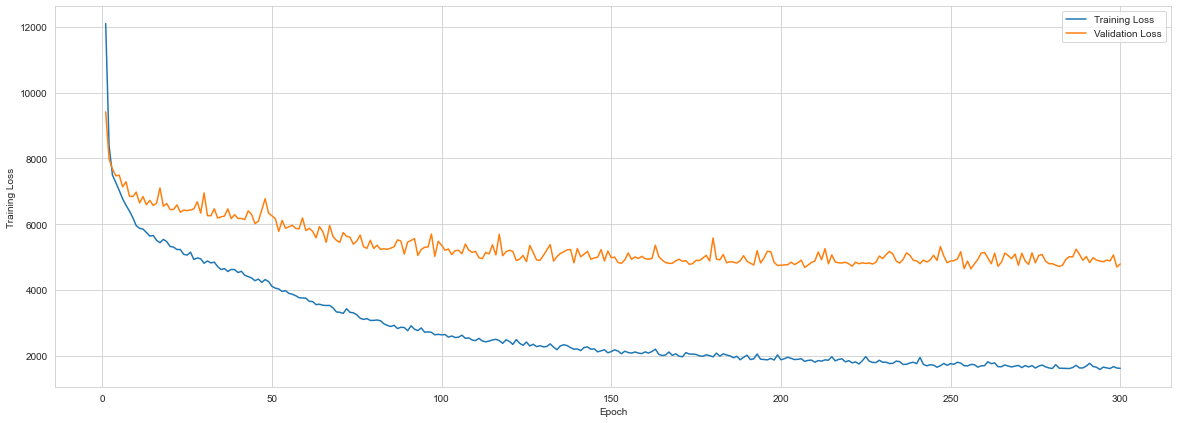

In [29]:
# train your model and collect the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# create a pandas DataFrame to store the loss values
df_loss = pd.DataFrame({'Epoch': range(1, len(train_loss)+1), 'Training Loss': train_loss, 'Validation Loss': val_loss})

# use seaborn to create a line chart
plt.figure(figsize=(20,7))
sns.set_style('whitegrid')
sns.lineplot(data=df_loss, x='Epoch', y='Training Loss', label='Training Loss')
sns.lineplot(data=df_loss, x='Epoch', y='Validation Loss', label='Validation Loss')
plt.show()

# Visualizing Prediction

In [33]:
y_pred = regr.predict(X_test)

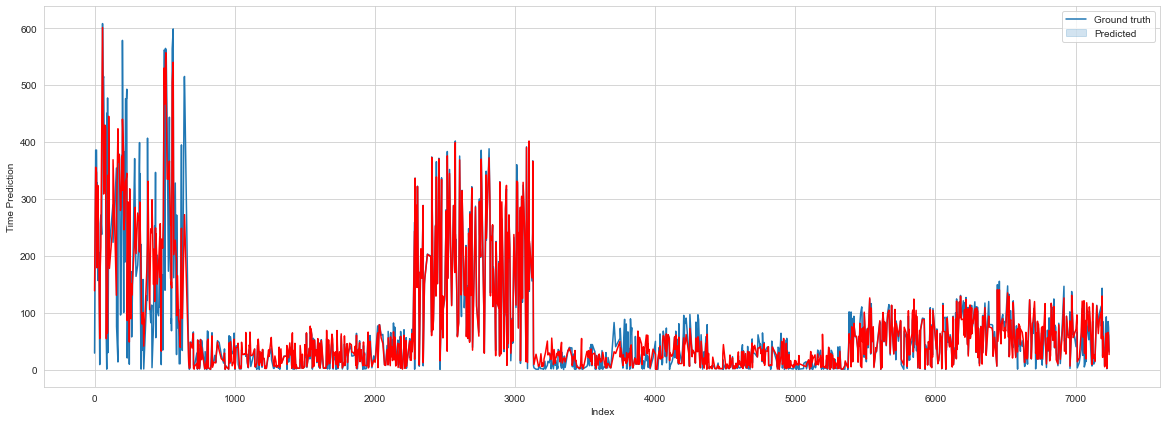

In [36]:
plt.figure(figsize=(20,7))
sns.lineplot(x=y_test.index, y=y_test, label='Ground truth')
sns.lineplot(x=y_test.index, y=y_pred, label='Predicted', color='red')

plt.xlabel(xlabel='Index')
plt.ylabel(ylabel='Time Prediction')
plt.legend(['Ground truth', 'Predicted'])

plt.show()

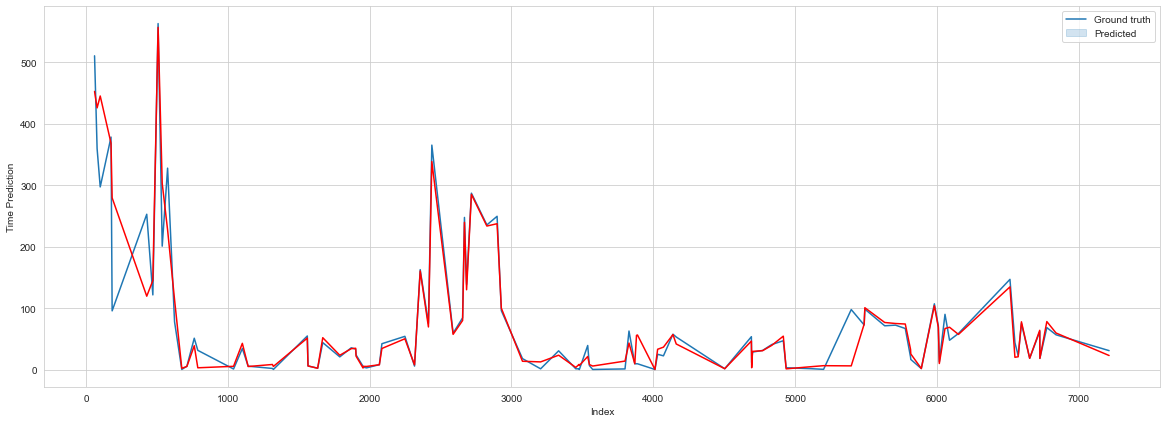

In [37]:
plt.figure(figsize=(20,7))
sns.lineplot(x=y_test[:100].index, y=y_test[:100], label='Ground truth')
sns.lineplot(x=y_test[:100].index, y=y_pred[:100], label='Predicted', color='red')

plt.xlabel(xlabel='Index')
plt.ylabel(ylabel='Time Prediction')
plt.legend(['Ground truth', 'Predicted'])

plt.show()

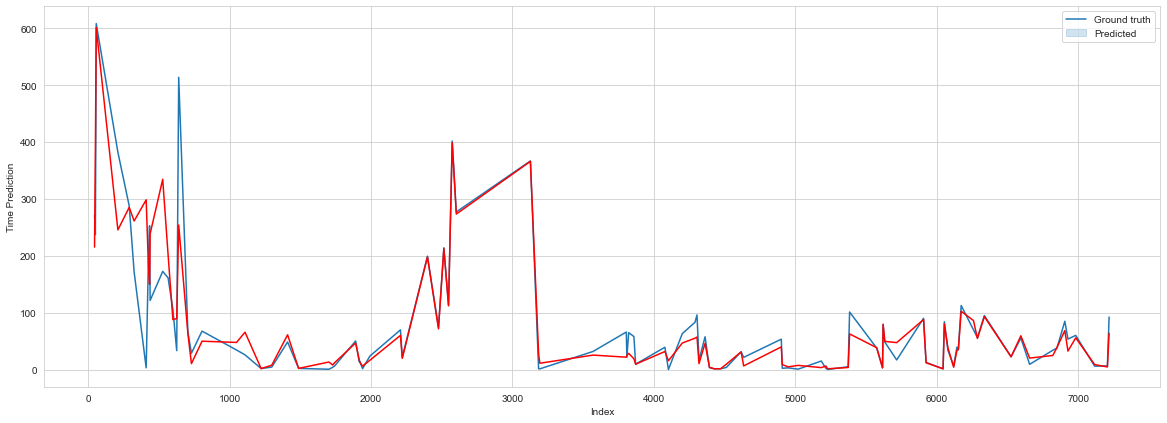

In [38]:
plt.figure(figsize=(20,7))
sns.lineplot(x=y_test[-100:].index, y=y_test[-100:], label='Ground truth')
sns.lineplot(x=y_test[-100:].index, y=y_pred[-100:], label='Predicted', color='red')

plt.xlabel(xlabel='Index')
plt.ylabel(ylabel='Time Prediction')
plt.legend(['Ground truth', 'Predicted'])

plt.show()

# Predicting Ongoing task time

In [40]:
df_ongoing = df[df['taskStatus'] == 'ongoing'].copy()
df_ongoing_to_predict = df_ongoing.drop(['taskStatus','taskId','timeDiffMinutes'],axis=1).copy()
df_ongoing_to_predict.head()

,taskCreatedTime,cod.amount,UserVar.receiver_city,UserVar.weight,isCOD,UserVar.branch_origin_AMI,UserVar.branch_origin_AMQ,UserVar.branch_origin_BDJ,UserVar.branch_origin_BDO,UserVar.branch_origin_BKI,...,UserVar.branch_dest_TGL,UserVar.branch_dest_TGR,UserVar.branch_dest_TIM,UserVar.branch_dest_TJQ,UserVar.branch_dest_TKG,UserVar.branch_dest_TNJ,UserVar.branch_dest_TRK,UserVar.branch_dest_TSM,UserVar.branch_dest_TTE,UserVar.branch_dest_UPG
7244,1667351194.00,0.00,406.00,1.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245,1667351194.00,0.00,1450.00,1.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7246,1667351194.00,550000.00,1450.00,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7247,1667351194.00,0.00,1450.00,1.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7248,1667351194.00,0.00,1445.00,1.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_ongoing['taskTimePredicted'] = regr.predict(df_ongoing_to_predict)

In [42]:
df_ongoing[['taskId','taskTimePredicted']].to_csv('data/ongoing-prediction.csv',index=False)